# <center>UrbanSound8K - Dataset Exploration</center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries-Import" data-toc-modified-id="Libraries-Import-1">Libraries Import</a></span></li><li><span><a href="#Import-of-the-Metadata-File" data-toc-modified-id="Import-of-the-Metadata-File-2">Import of the Metadata File</a></span></li><li><span><a href="#Classes-Counts" data-toc-modified-id="Classes-Counts-3">Classes Counts</a></span></li><li><span><a href="#Duration-of-Events" data-toc-modified-id="Duration-of-Events-4">Duration of Events</a></span><ul class="toc-item"><li><span><a href="#Global" data-toc-modified-id="Global-4.1">Global</a></span></li><li><span><a href="#Per-Class" data-toc-modified-id="Per-Class-4.2">Per Class</a></span></li></ul></li><li><span><a href="#Salience" data-toc-modified-id="Salience-5">Salience</a></span><ul class="toc-item"><li><span><a href="#Global" data-toc-modified-id="Global-5.1">Global</a></span></li><li><span><a href="#Per-Class" data-toc-modified-id="Per-Class-5.2">Per Class</a></span></li></ul></li><li><span><a href="#Folds-Distribution" data-toc-modified-id="Folds-Distribution-6">Folds Distribution</a></span></li></ul></div>

## Libraries Import

In [49]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Import of the Metadata File

In [50]:
metadata = pd.read_csv("dataset/UrbanSound8K.csv")
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


## Classes Counts

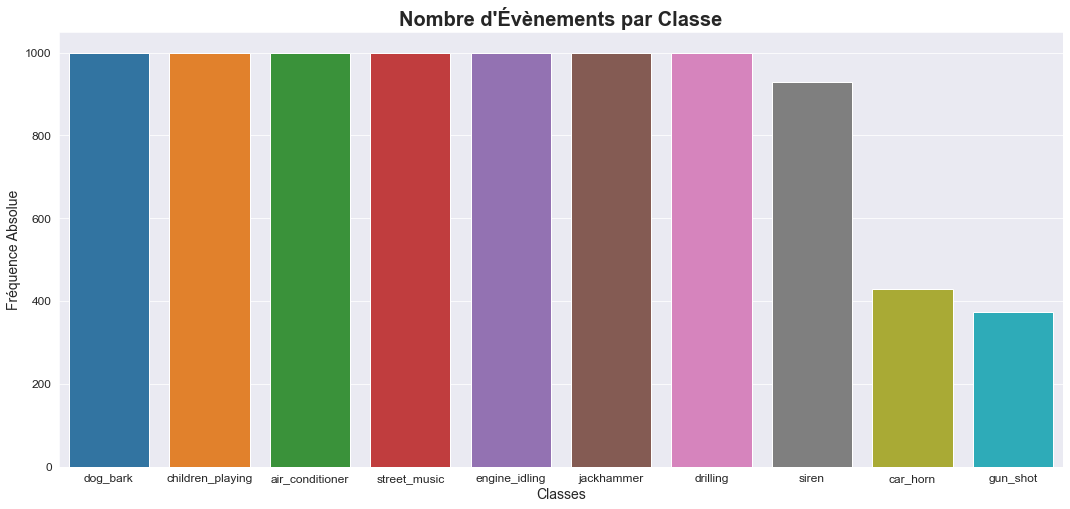

In [51]:
fig, ax = plt.subplots(figsize=(18,8))
sns.countplot(x="class", data=metadata, order=metadata["class"].value_counts().index, ax=ax)
#ax.set_title("Classes Counts", fontsize=20, fontweight="bold")
#ax.set_xlabel("Classes", fontsize=14)
#ax.set_ylabel("Counts", fontsize=14)
ax.set_title("Nombre d'Évènements par Classe", fontsize=20, fontweight="bold")
ax.set_xlabel("Classes", fontsize=14)
ax.set_ylabel("Fréquence Absolue", fontsize=14)
ax.tick_params(axis="both", labelsize=12)
plt.savefig("figures/UrbanSound8K - Nombre d'Évènements par Classe", bbox_inches="tight")
plt.show()

## Duration of Events

### Global

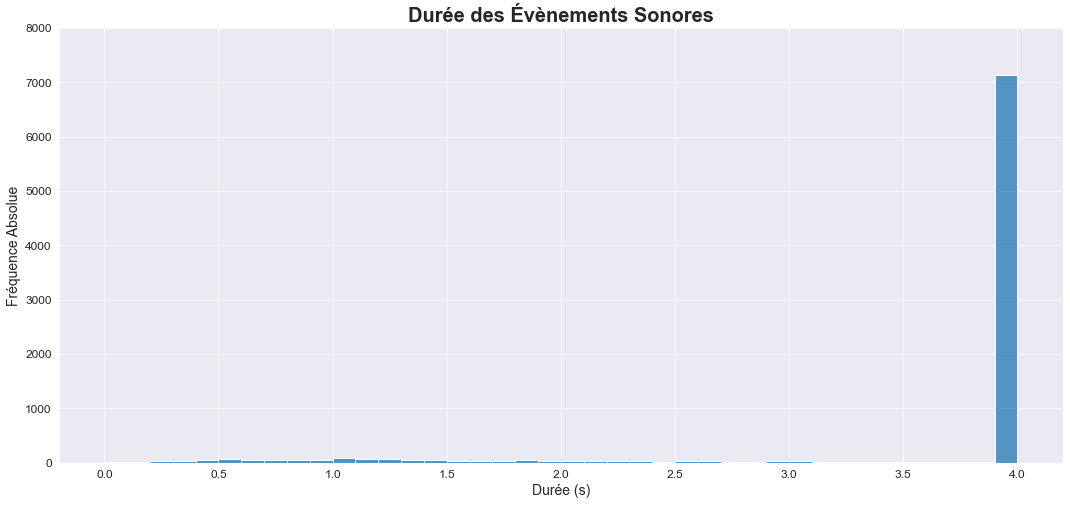

In [52]:
duration = metadata["end"] - metadata["start"]
fig, ax = plt.subplots(figsize=(18,8))
sns.histplot(data=duration, x=duration.values, binrange=(0,4), binwidth=0.1, ax=ax)
#ax.set_title("Duration of Events", fontsize=20, fontweight="bold")
#ax.set_xlabel("Duration (s)", fontsize=14)
#ax.set_ylabel("Counts", fontsize=14)
ax.set_title("Durée des Évènements Sonores", fontsize=20, fontweight="bold")
ax.set_xlabel("Durée (s)", fontsize=14)
ax.set_ylabel("Fréquence Absolue", fontsize=14)
ax.set_ylim([0, 8000])
ax.tick_params(axis="both", labelsize=12)
plt.savefig("figures/UrbanSound8K - Durée des Évènements Sonores (Toutes Classes Confondues)", bbox_inches="tight")
plt.show()

### Per Class

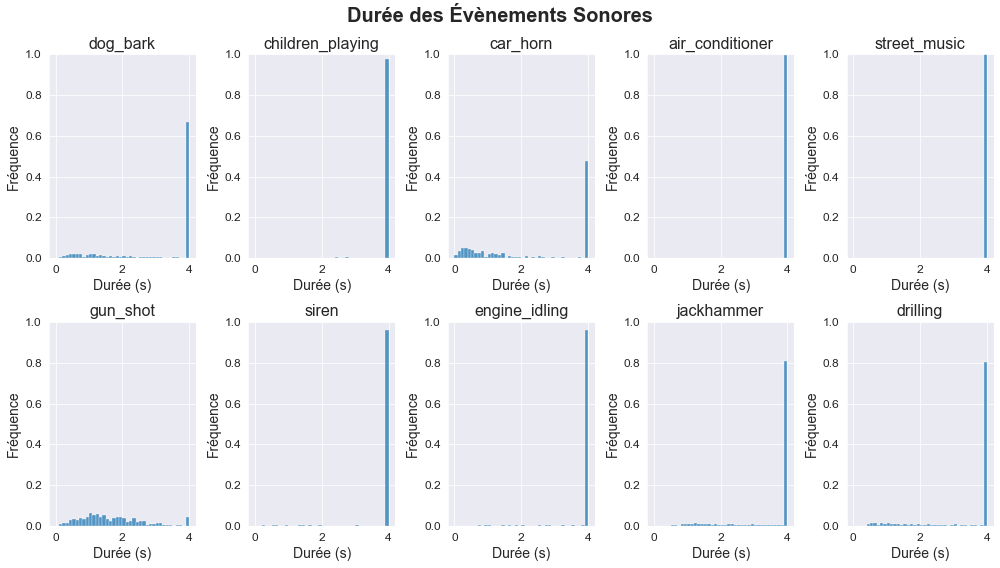

In [53]:
# Set subplot figure parameters
n_cols = 5
n_rows = math.ceil(len(metadata["class"].unique())/n_cols) # Compute the number of rows based on the number of labels and columns

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14,8))
axes = axes.flatten()

# For each unique class
for index, unique_class in enumerate(metadata["class"].unique()):
    # Filter the metadata based on the class
    filtered_metadata = metadata[metadata["class"]==unique_class]
    duration = filtered_metadata["end"] - filtered_metadata["start"]
    ax = axes[index]
    sns.histplot(x=duration.values, data=duration, stat="probability", binrange=(0,4), binwidth=0.1, ax=ax)
    ax.set_title(f"{unique_class}", fontsize=16)
    #ax.set_xlabel("Duration (s)", fontsize=14)
    #ax.set_ylabel("Counts", fontsize=14)
    ax.set_xlabel("Durée (s)", fontsize=14)
    ax.set_ylabel("Fréquence", fontsize=14)
    ax.set_ylim([0, 1])
    ax.tick_params(axis="both", labelsize=12)

#plt.suptitle("Duration of Events", fontsize=20, fontweight="bold")
plt.suptitle("Durée des Évènements Sonores", fontsize=20, fontweight="bold")
plt.tight_layout()
plt.savefig("figures/UrbanSound8K - Durée des Évènements Sonores (par Classe)", bbox_inches="tight")
plt.show()

## Salience

### Global

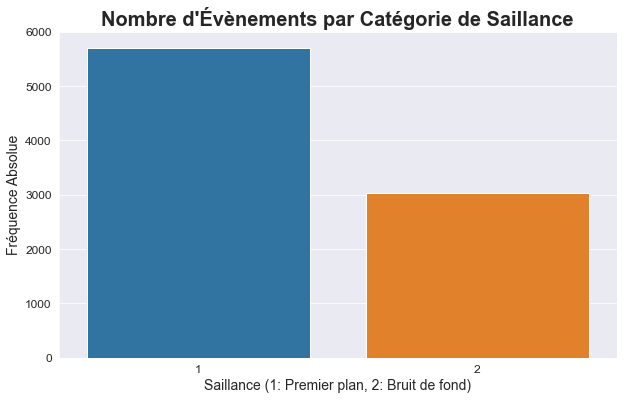

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="salience", data=metadata, ax=ax)
#ax.set_title("Salience Counts", fontsize=20, fontweight="bold")
#ax.set_xlabel("Salience", fontsize=14)
#ax.set_ylabel("Counts", fontsize=14)
ax.set_title("Nombre d'Évènements par Catégorie de Saillance", fontsize=20, fontweight="bold")
ax.set_xlabel("Saillance (1: Premier plan, 2: Bruit de fond)", fontsize=14)
ax.set_ylabel("Fréquence Absolue", fontsize=14)
ax.set_ylim([0, 6000])
ax.tick_params(axis="both", labelsize=12)
plt.savefig("figures/UrbanSound8K - Nombre d'Évènements par Catégorie de Saillance (Toutes Classes Confondues)", bbox_inches="tight")
plt.show()

### Per Class

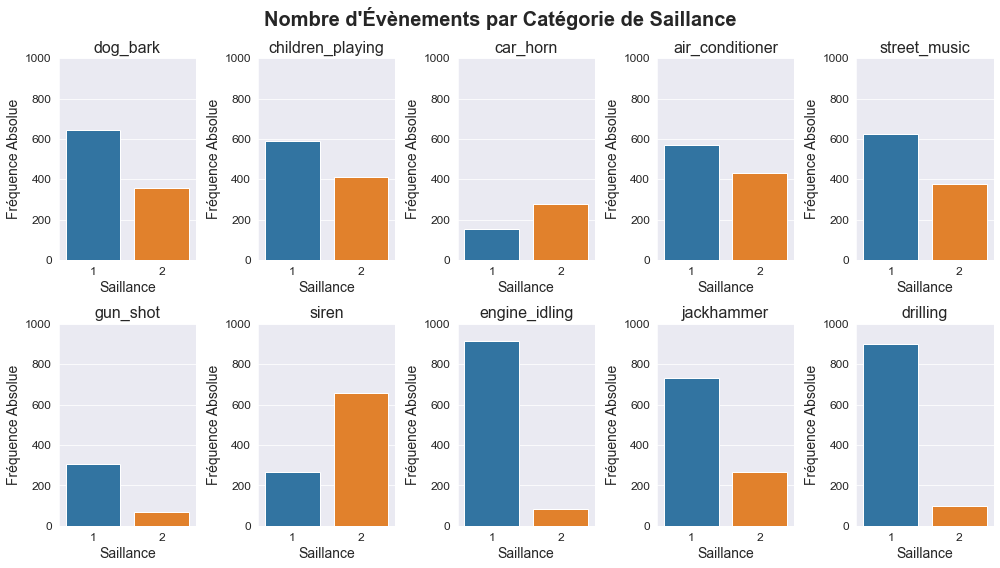

In [55]:
# Set subplot figure parameters
n_cols = 5
n_rows = math.ceil(len(metadata["class"].unique())/n_cols) # Compute the number of rows based on the number of labels and columns

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14,8))
axes = axes.flatten()

# For each unique class
for index, unique_class in enumerate(metadata["class"].unique()):
    # Filter the metadata based on the class
    filtered_metadata = metadata[metadata["class"]==unique_class]
    perc = filtered_metadata["salience"].value_counts(normalize=True)
    ax = axes[index]
    sns.countplot(x="salience", data=filtered_metadata, ax=ax)
    ax.set_title(f"{unique_class}", fontsize=16)
    #ax.set_xlabel("Salience", fontsize=14)
    #ax.set_ylabel("Counts", fontsize=14)
    ax.set_xlabel("Saillance", fontsize=14)
    ax.set_ylabel("Fréquence Absolue", fontsize=14)
    ax.set_ylim([0, 1000])
    ax.tick_params(axis="both", labelsize=12)

#plt.suptitle("Salience Counts", fontsize=20, fontweight="bold")
plt.suptitle("Nombre d'Évènements par Catégorie de Saillance", fontsize=20, fontweight="bold")
plt.tight_layout()
plt.savefig("figures/UrbanSound8K - Nombre d'Évènements par Catégorie de Saillance (par Classe)", bbox_inches="tight")
plt.show()

## Folds Distribution

In [46]:
# Group by fold and label and pivot
folds_vc = metadata.groupby(["fold", "class"], dropna=False, as_index=False)["class"].size()
folds_vc.pivot(index="class", columns="fold", values="size")

fold,1,2,3,4,5,6,7,8,9,10
class,,,,,,,,,,
air_conditioner,100,100,100,100,100,100,100,100,100,100
car_horn,36,42,43,59,98,28,28,30,32,33
children_playing,100,100,100,100,100,100,100,100,100,100
dog_bark,100,100,100,100,100,100,100,100,100,100
drilling,100,100,100,100,100,100,100,100,100,100
engine_idling,96,100,107,107,107,107,106,88,89,93
gun_shot,35,35,36,38,40,46,51,30,31,32
jackhammer,120,120,120,120,120,68,76,78,82,96
siren,86,91,119,166,71,74,77,80,82,83
